# **MLP**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import json
import os

data = pd.read_csv('/content/drive/MyDrive/Epro/preprocessed_data_for_phishingfishing.csv')

data.head()

,Unnamed: 0,url,unshorten,length,at,double_slash,http,hyphen,dot,slash,ip_form,brand,phishing
0,0,http://seguridadar7912.byethost9.com/pase.php,http://seguridadar7912.byethost9.com/pase.php,45,0,0,1,0,3,1,0,0.500000,1
1,1,http://kpatacusot.com/first/mazon/amazon/homep...,0,50,0,0,1,0,1,5,0,1.000000,1
2,2,http://kpatacusot.com/first/mazon/f7404/,0,40,0,0,1,0,1,4,0,0.833333,1
3,3,https://hufschuh.app/online.americanexpress.com,0,47,0,0,0,0,3,2,0,1.000000,1
4,4,http://kpatacusot.com/first/mazon/amazon/,0,41,0,0,1,0,1,4,0,1.000000,1


In [3]:
data = data.drop(['url'], axis = 1)
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.drop(['slash'], axis = 1)

In [4]:
for unshorten in data['unshorten']:
  if unshorten == '0':
    data['unshorten'] = data['unshorten'].replace([unshorten], 0)
  elif unshorten != 0:
    data['unshorten'] = data['unshorten'].replace([unshorten], 1)

data.head()

,unshorten,length,at,double_slash,http,hyphen,dot,ip_form,brand,phishing
0,1,45,0,0,1,0,3,0,0.500000,1
1,0,50,0,0,1,0,1,0,1.000000,1
2,0,40,0,0,1,0,1,0,0.833333,1
3,0,47,0,0,0,0,3,0,1.000000,1
4,0,41,0,0,1,0,1,0,1.000000,1


In [5]:
train_data = data.drop('phishing', axis = 1)
target = data['phishing']

train_data.shape, target.shape

((20000, 9), (20000,))

In [6]:
import numpy as np # linear algebra
np.random.seed(10)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [7]:
features = data[['unshorten', 'length', 'at', 'double_slash', 'http', 'hyphen', 'dot', 'ip_form', 'brand']].to_numpy()
labels = data['phishing'].to_numpy()

In [8]:
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = x/(1-x)
    else : # sigmoid
        f = 1/(1+ np.exp(-x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der== True):
        if x>0 :
            f= 1
        else :
            f = 0
    else :
        if x>0:
            f = x
        else :
            f = 0
    return f

# Now we are ready to define the perceptron; 
# it eats a np.array (that may be a list of features )
def perceptron(X, act='Sigmoid'): 
    import numpy as np
    
    shapes = X.shape # Pick the number of (rows, columns)!
    n= shapes[0]+shapes[1]
    # Generating random weights and bias
    w = 2*np.random.random(shapes) - 0.5 # We want w to be between -1 and 1
    b = np.random.random(1)
    
    # Initialize the function
    f = b[0]
    for i in range(0, X.shape[0]-1) : # run over column elements
        for j in range(0, X.shape[1]-1) : # run over rows elements
            f += w[i, j]*X[i,j]/n
    # Pass it to the activation function and return it as an output
    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)
        
    return output

In [9]:
print('Output with sigmoid activator: ', perceptron(features))
print('Output with ReLU activator: ', perceptron(features))

Output with sigmoid activator:  0.9999999999656117
Output with ReLU activator:  0.9999999999706537


In [10]:
import numpy as np

# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

In [11]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 15000
Test records: 5000


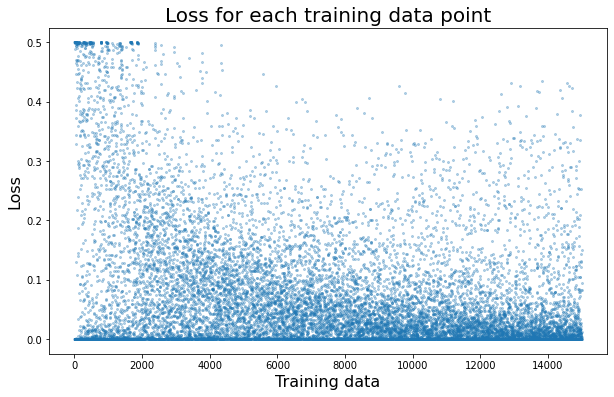

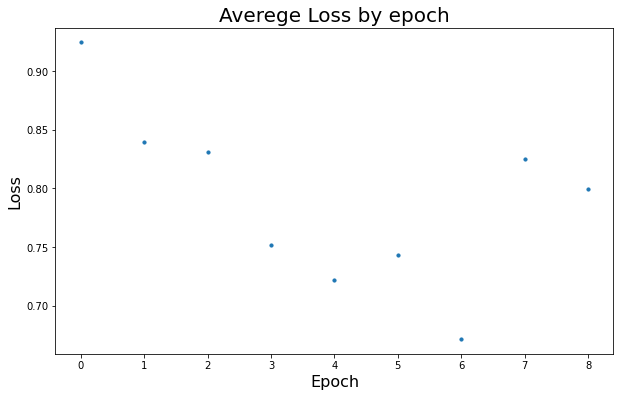

In [12]:
# Set up the number of perceptron per each layer:
p=4 # Layer 1
q=4 # Layer 2

# Set up the Learning rate
eta =  1/623


# 0: Random initialize the relevant data 
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

# Start looping over the passengers, i.e. over I.

for I in range(0, X_train.shape[0]): #loop in all the passengers:
    
    # 1: input the data 
    x = X_train[I]
    
    
    # 2: Start the algorithm
    
    # 2.1: Feed forward
    z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
    z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
    #2.2: Compute the output layer's error
    delta_Out =  (y-Y_train[I]) * sigmoid_act(y, der=True)
    
    #2.3: Backpropagate
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
    # 3: Gradient descent 
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out
    
    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2
    
    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1
    
    # 4. Computation of the loss function
    mu.append((1/2)*(y-Y_train[I])**2)
    vec_y.append(y[0])


# Plotting the Cost function for each training data     
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

# Plotting the average cost function over 10 training data    
pino = []
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)
    
    

plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Averege Loss by epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()